In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
adata = sc.read("/home/lugli/spuccio/Projects/SP039/GBmap/CD8_filtate.h5ad")

In [3]:
print(adata.n_obs, adata.n_vars)
ribo_genes = adata.var_names.str.startswith(("RPL","RPS"))
malat1 = adata.var_names.str.startswith('MALAT1')
remove = np.add(ribo_genes, malat1)
keep = np.invert(remove)
adata = adata[:,keep]
print(adata.n_obs, adata.n_vars)

24644 20088
24644 19993


In [4]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

/home/lugli/spuccio/scanpy/scanpy/preprocessing/_simple.py:159: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number


In [5]:
adata

AnnData object with n_obs × n_vars = 19061 × 14471
    obs: 'author', 'donor_id', 'annotation_level_1', 'annotation_level_2', 'annotation_level_3', 'stage', 'location', 'celltype_original', 'EGFR', 'MET', 'p53', 'TERT', 'ATRX', 'PTEN', 'MGMT', 'chr1p19q', 'PDGFR', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'development_stage', 'batch', 'n_genes'
    var: 'ensembl_gene_id-0', 'chromosome_name-0', 'description-0', 'gene_biotype-0', 'n_cells'
    obsm: 'X_umap'
    layers: 'raw'

In [6]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [7]:
sc.pp.log1p(adata)

In [8]:
adata.raw = adata

In [9]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

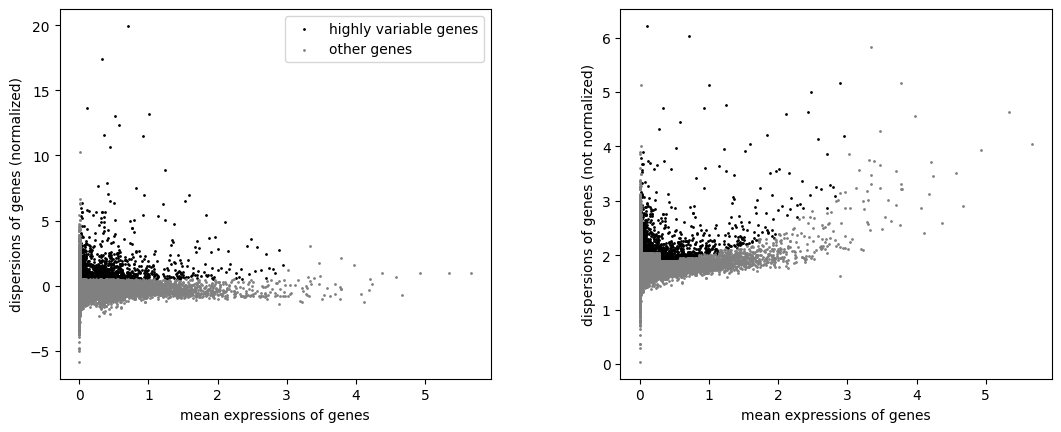

In [10]:
sc.pl.highly_variable_genes(adata)

In [11]:
adata = adata[:,adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)

/home/lugli/spuccio/scanpy/scanpy/preprocessing/_simple.py:924: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [12]:
sc.tl.pca(adata, svd_solver='arpack',random_state=0)

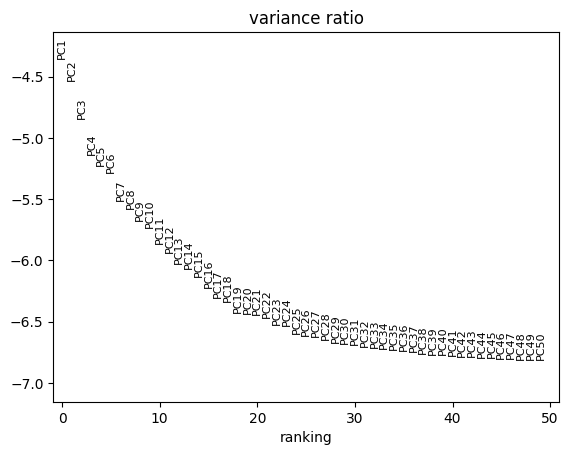

In [13]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)

In [14]:
import scanpy.external as sce
sce.pp.harmony_integrate(adata, ['author', 'donor_id','stage','assay'])

2024-01-09 16:47:41,559 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-01-09 16:47:43,816 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-01-09 16:47:43,871 - harmonypy - INFO - Iteration 1 of 10
2024-01-09 16:47:47,541 - harmonypy - INFO - Iteration 2 of 10
2024-01-09 16:47:51,306 - harmonypy - INFO - Iteration 3 of 10
2024-01-09 16:47:54,994 - harmonypy - INFO - Iteration 4 of 10
2024-01-09 16:47:58,713 - harmonypy - INFO - Iteration 5 of 10
2024-01-09 16:48:00,225 - harmonypy - INFO - Iteration 6 of 10
2024-01-09 16:48:03,935 - harmonypy - INFO - Iteration 7 of 10
2024-01-09 16:48:05,602 - harmonypy - INFO - Iteration 8 of 10
2024-01-09 16:48:07,269 - harmonypy - INFO - Iteration 9 of 10
2024-01-09 16:48:10,521 - harmonypy - INFO - Iteration 10 of 10
2024-01-09 16:48:14,262 - harmonypy - INFO - Stopped before convergence


In [15]:
adata.obsm['X_pca'] = adata.obsm['X_pca_harmony']

In [16]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=25)

/home/lugli/spuccio/anaconda3/envs/scanpy195/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
sc.tl.umap(adata)

In [18]:
sc.tl.leiden(adata, resolution=0.5)

In [19]:
adata.obs

,author,donor_id,annotation_level_1,annotation_level_2,annotation_level_3,stage,location,celltype_original,EGFR,MET,...,PDGFR,cell_type,assay,disease,sex,tissue,development_stage,batch,n_genes,leiden
NS02-9,Kim2020,NS02,NotAvailable,NotAvailable,NotAvailable,Metastasis,NotAvailable,NotAvailable,WT,NotAvailable,...,NotAvailable,NotAvailable,10x 3' v2,glioblastoma,NotAvailable,Lung,NotAvailable,1,461,5
NS02-14,Kim2020,NS02,NotAvailable,NotAvailable,NotAvailable,Metastasis,NotAvailable,NotAvailable,WT,NotAvailable,...,NotAvailable,NotAvailable,10x 3' v2,glioblastoma,NotAvailable,Lung,NotAvailable,1,747,0
NS02-19,Kim2020,NS02,NotAvailable,NotAvailable,NotAvailable,Metastasis,NotAvailable,NotAvailable,WT,NotAvailable,...,NotAvailable,NotAvailable,10x 3' v2,glioblastoma,NotAvailable,Lung,NotAvailable,1,550,9
NS02-26,Kim2020,NS02,NotAvailable,NotAvailable,NotAvailable,Metastasis,NotAvailable,NotAvailable,WT,NotAvailable,...,NotAvailable,NotAvailable,10x 3' v2,glioblastoma,NotAvailable,Lung,NotAvailable,1,1007,6
NS02-37,Kim2020,NS02,NotAvailable,NotAvailable,NotAvailable,Metastasis,NotAvailable,NotAvailable,WT,NotAvailable,...,NotAvailable,NotAvailable,10x 3' v2,glioblastoma,NotAvailable,Lung,NotAvailable,1,534,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB_20_1501,Smalley2021,MB_20,NotAvailable,NotAvailable,NotAvailable,Normal,NotAvailable,NotAvailable,NotAvailable,NotAvailable,...,NotAvailable,NotAvailable,10x 3' v2,Melanoma,NotAvailable,NotAvailable,NotAvailable,1,659,0
MB_20_1506,Smalley2021,MB_20,NotAvailable,NotAvailable,NotAvailable,Normal,NotAvailable,NotAvailable,NotAvailable,NotAvailable,...,NotAvailable,NotAvailable,10x 3' v2,Melanoma,NotAvailable,NotAvailable,NotAvailable,1,231,1
MB_20_1523,Smalley2021,MB_20,NotAvailable,NotAvailable,NotAvailable,Normal,NotAvailable,NotAvailable,NotAvailable,NotAvailable,...,NotAvailable,NotAvailable,10x 3' v2,Melanoma,NotAvailable,NotAvailable,NotAvailable,1,914,3
MB_20_1576,Smalley2021,MB_20,NotAvailable,NotAvailable,NotAvailable,Normal,NotAvailable,NotAvailable,NotAvailable,NotAvailable,...,NotAvailable,NotAvailable,10x 3' v2,Melanoma,NotAvailable,NotAvailable,NotAvailable,1,539,1


/home/lugli/spuccio/scanpy/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/lugli/spuccio/scanpy/scanpy/plotting/_tools/scatterplots.py:388: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/lugli/spuccio/scanpy/scanpy/plotting/_tools/scatterplots.py:401: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


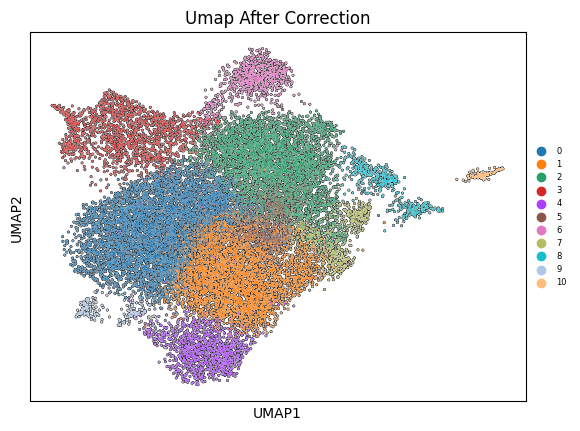

In [20]:
sc.pl.umap(adata, color=['leiden'], legend_fontsize=6, frameon=True, ncols = 2,
                        wspace=.5, hspace=0.4, title="Umap After Correction",add_outline=True)

/home/lugli/spuccio/scanpy/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/lugli/spuccio/scanpy/scanpy/plotting/_tools/scatterplots.py:388: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/lugli/spuccio/scanpy/scanpy/plotting/_tools/scatterplots.py:401: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


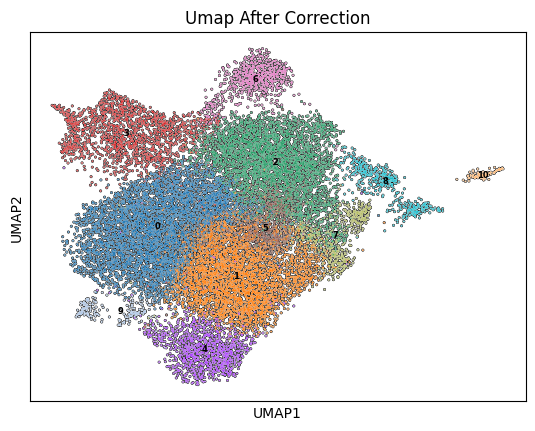

In [22]:
sc.pl.umap(adata, color=['leiden'], legend_fontsize=6, frameon=True, ncols = 2,
                        wspace=.5, hspace=0.4, title="Umap After Correction",add_outline=True,legend_loc="on data")

/home/lugli/spuccio/scanpy/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/lugli/spuccio/scanpy/scanpy/plotting/_tools/scatterplots.py:388: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/lugli/spuccio/scanpy/scanpy/plotting/_tools/scatterplots.py:401: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lugli/spuccio/scanpy/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/home/lugli/spuccio/scanpy/scanpy/plotting/_tools/scatterplots.py:388: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(


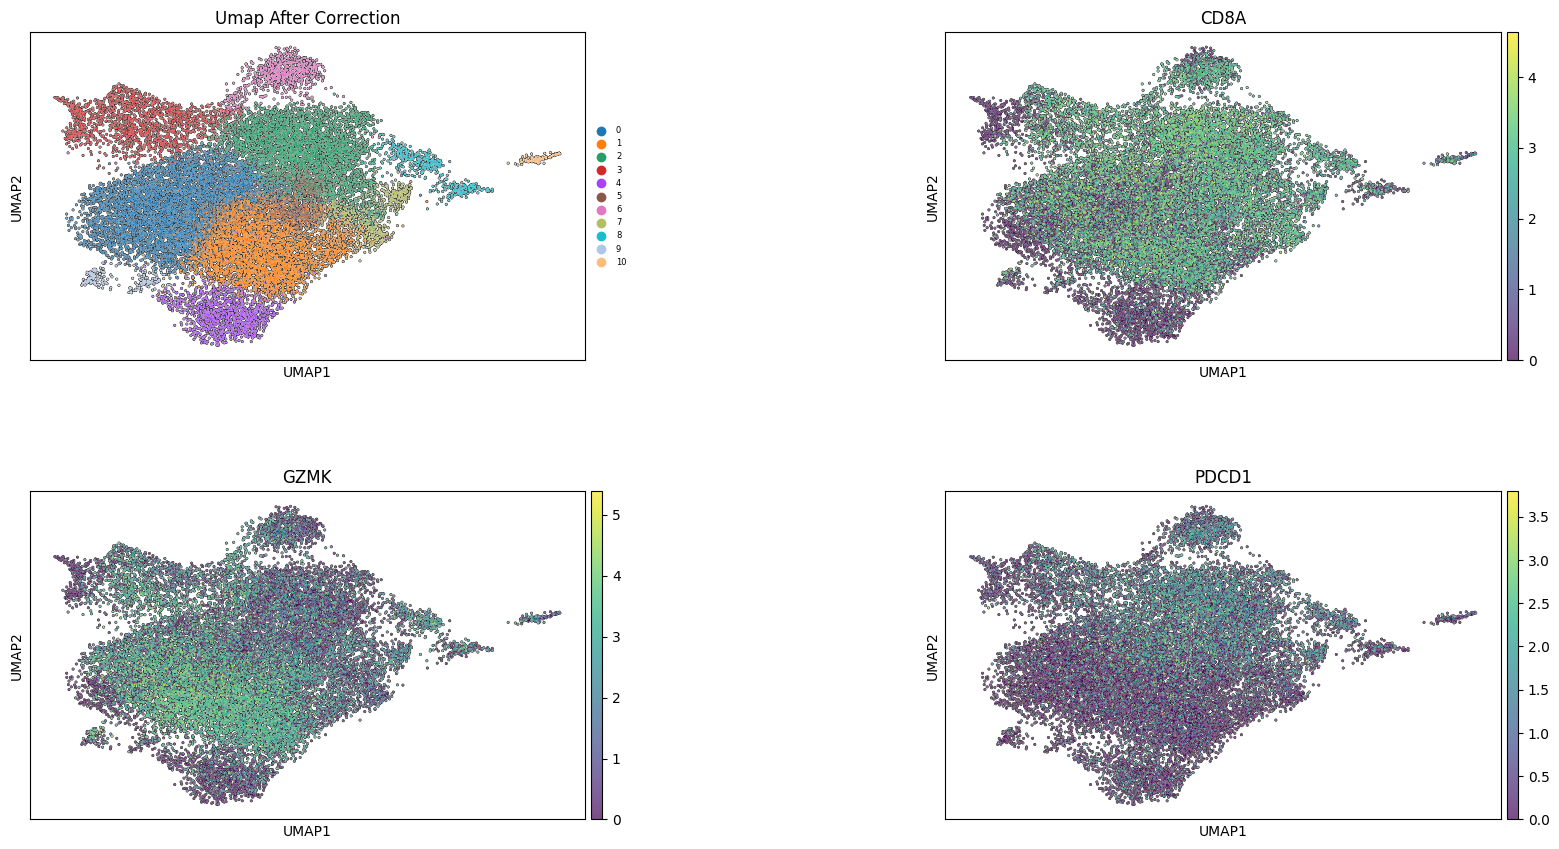

In [25]:
sc.pl.umap(adata, color=['leiden','CD8A','GZMK','PDCD1'], legend_fontsize=6, frameon=True, ncols = 2,
                        wspace=.5, hspace=0.4, title="Umap After Correction",add_outline=True)

/home/lugli/spuccio/scanpy/scanpy/plotting/_anndata.py:906: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/home/lugli/spuccio/scanpy/scanpy/plotting/_anndata.py:906: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/home/lugli/spuccio/scanpy/scanpy/plotting/_anndata.py:906: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/home/lugli/spuccio/scanpy/scanpy/plotting/_anndata.py:906: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/home/lugli/spuccio/scanpy/s

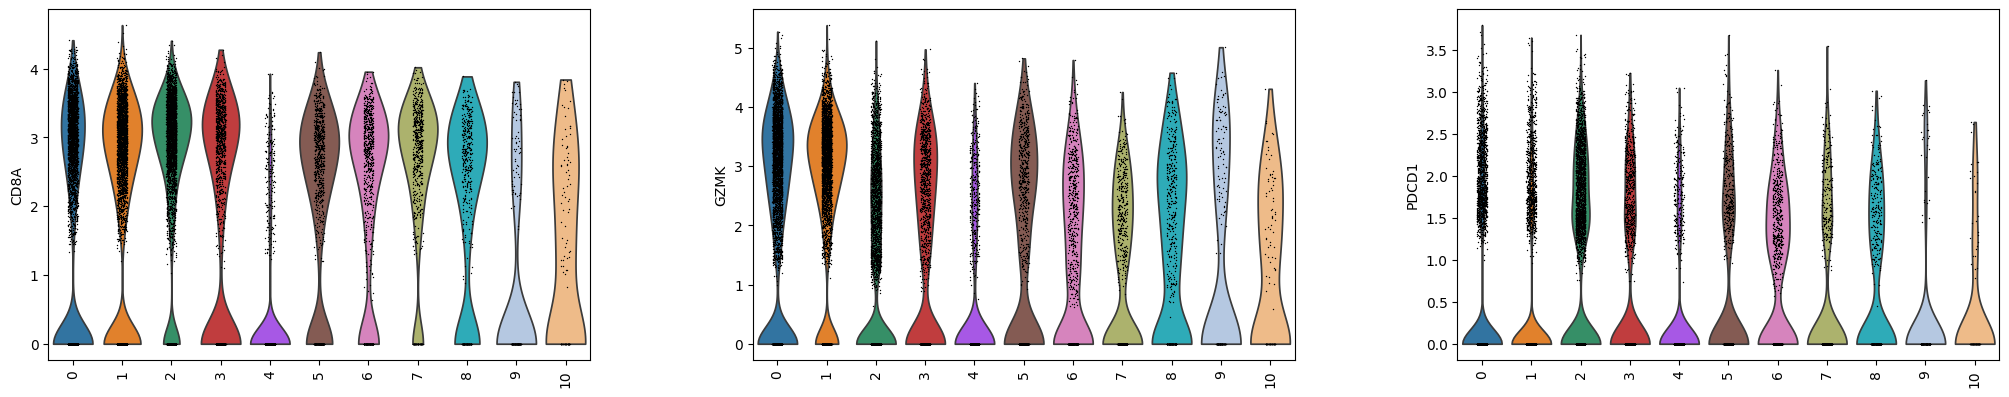

In [32]:
sc.pl.violin(adata, ['CD8A','GZMK','PDCD1'], groupby='leiden',stripplot=True,
             use_raw=True,jitter=True,rotation=90)

In [34]:
from statannot import add_stat_annotation
from matplotlib import pyplot as plt

/tmp/ipykernel_22496/1949974670.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax1 = adata.obs.groupby("leiden")["author"].value_counts(normalize=True).unstack().plot.bar(stacked=True,legend=False,ax=ax1)
/tmp/ipykernel_22496/1949974670.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax2 = adata.obs.groupby("leiden")["author"].value_counts(normalize=False).unstack().plot.bar(stacked=True,legend=False,ax=ax2)


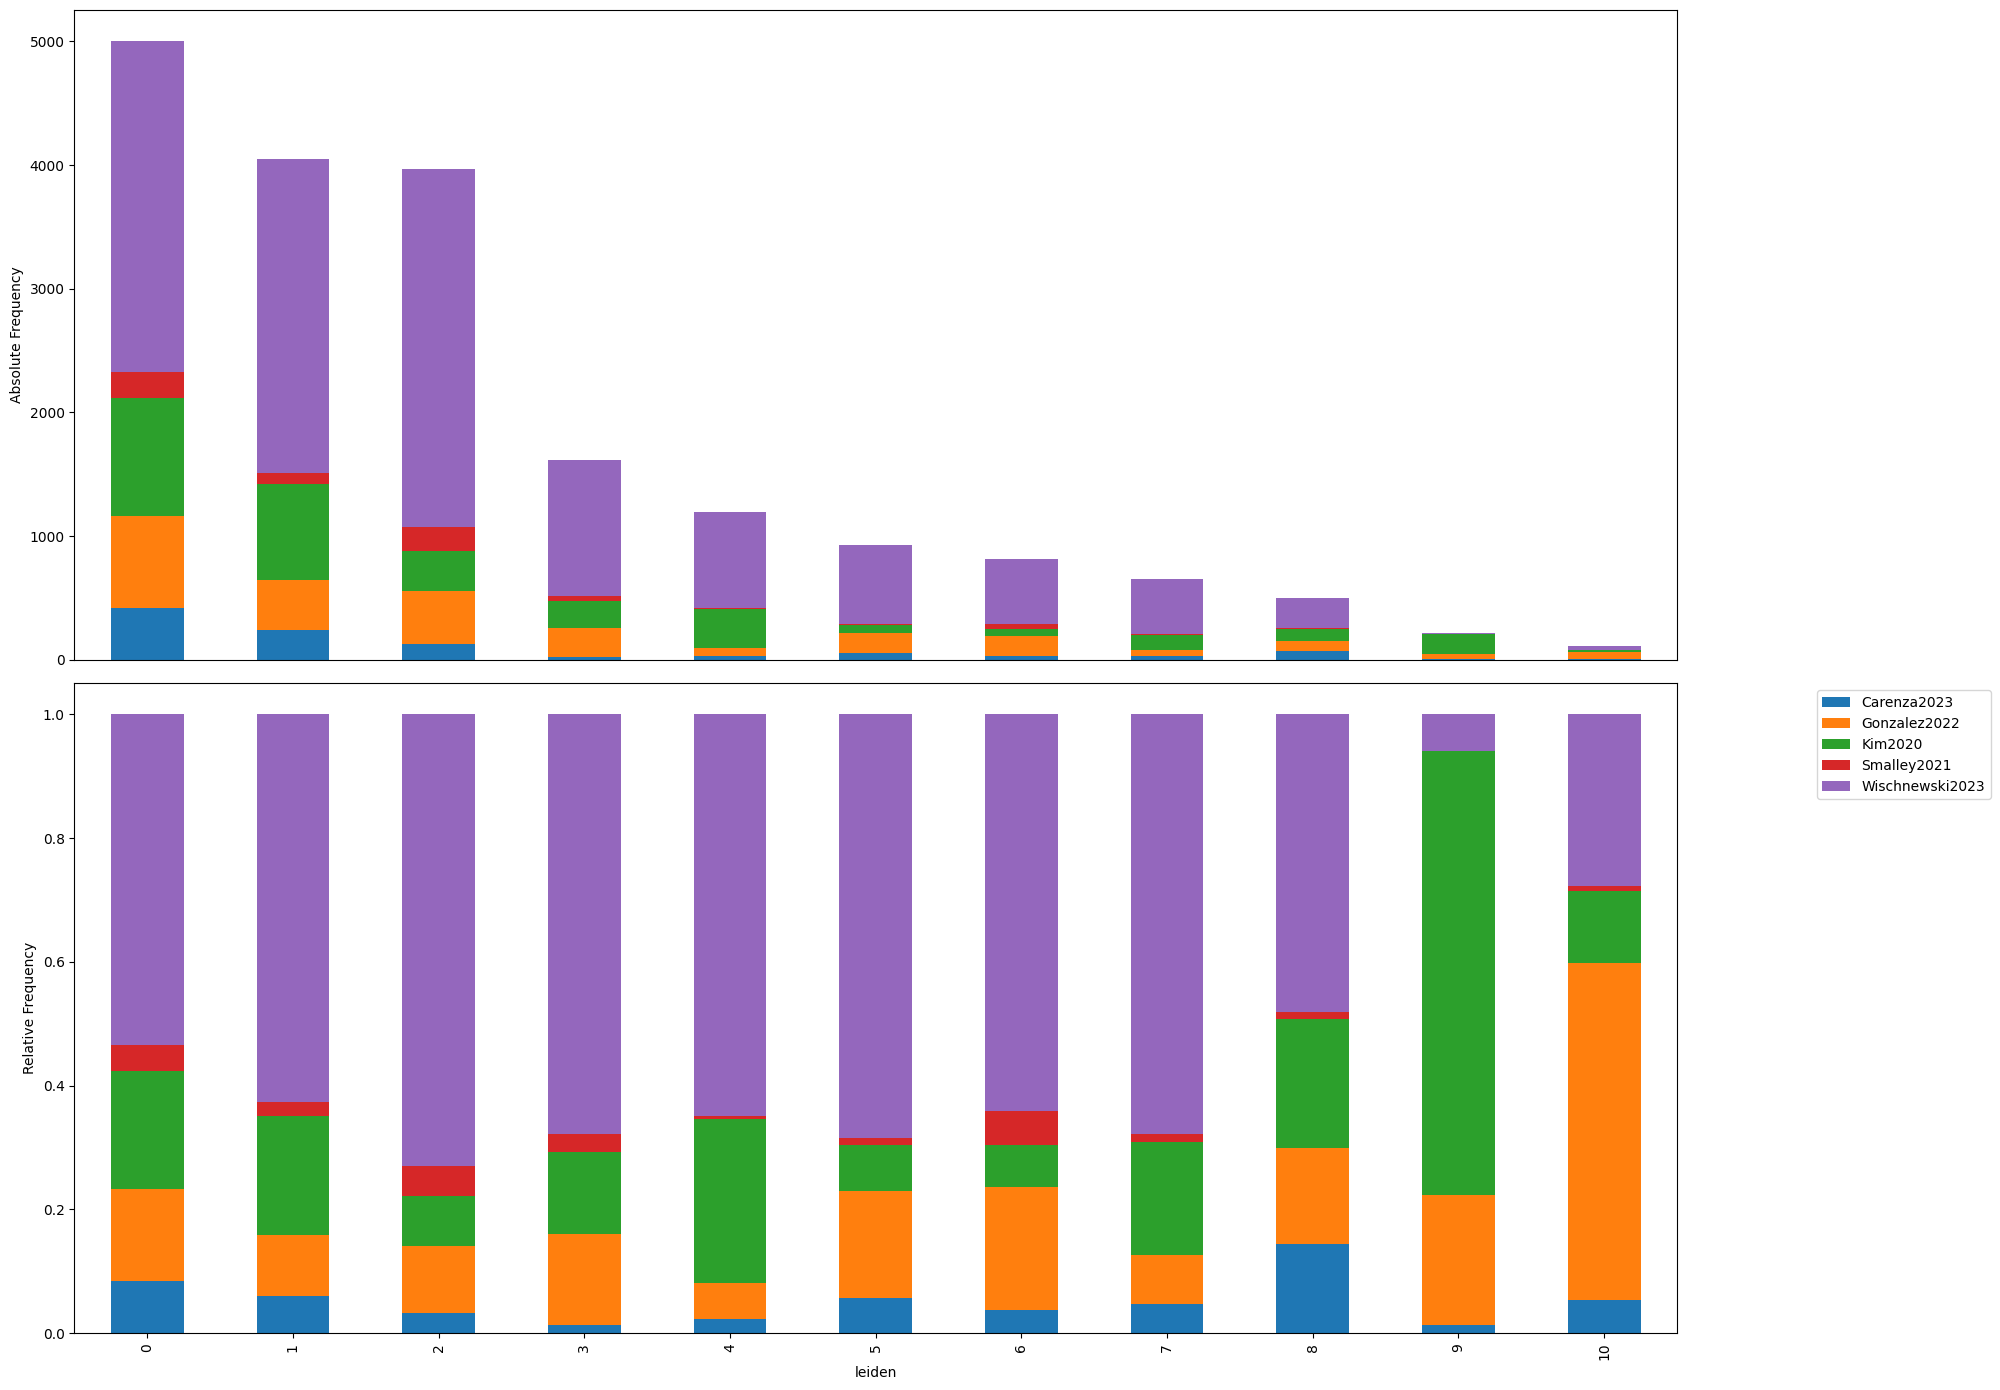

In [35]:
fig, (ax2, ax1) = plt.subplots(2, 1,figsize=(20, 14))
ax1 = adata.obs.groupby("leiden")["author"].value_counts(normalize=True).unstack().plot.bar(stacked=True,legend=False,ax=ax1)
ax2.set_xlabel(" ")
ax2.get_xaxis().set_visible(False)
ax1.set_ylabel("Relative Frequency")
ax1.grid(False)
ax1.legend(bbox_to_anchor=(1.2, 1.0))
ax2 = adata.obs.groupby("leiden")["author"].value_counts(normalize=False).unstack().plot.bar(stacked=True,legend=False,ax=ax2)
ax2.set_xlabel("Cluster")
ax2.set_ylabel("Absolute Frequency")
ax2.grid(False)
fig.tight_layout()

/tmp/ipykernel_22496/3679200505.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax1 = adata.obs.groupby("leiden")["stage"].value_counts(normalize=True).mul(100).unstack().plot.bar(stacked=True,legend=False,ax=ax1)
/tmp/ipykernel_22496/3679200505.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax2 = adata.obs.groupby("leiden")["stage"].value_counts(normalize=False).mul(100).unstack().plot.bar(stacked=True,legend=False,ax=ax2)


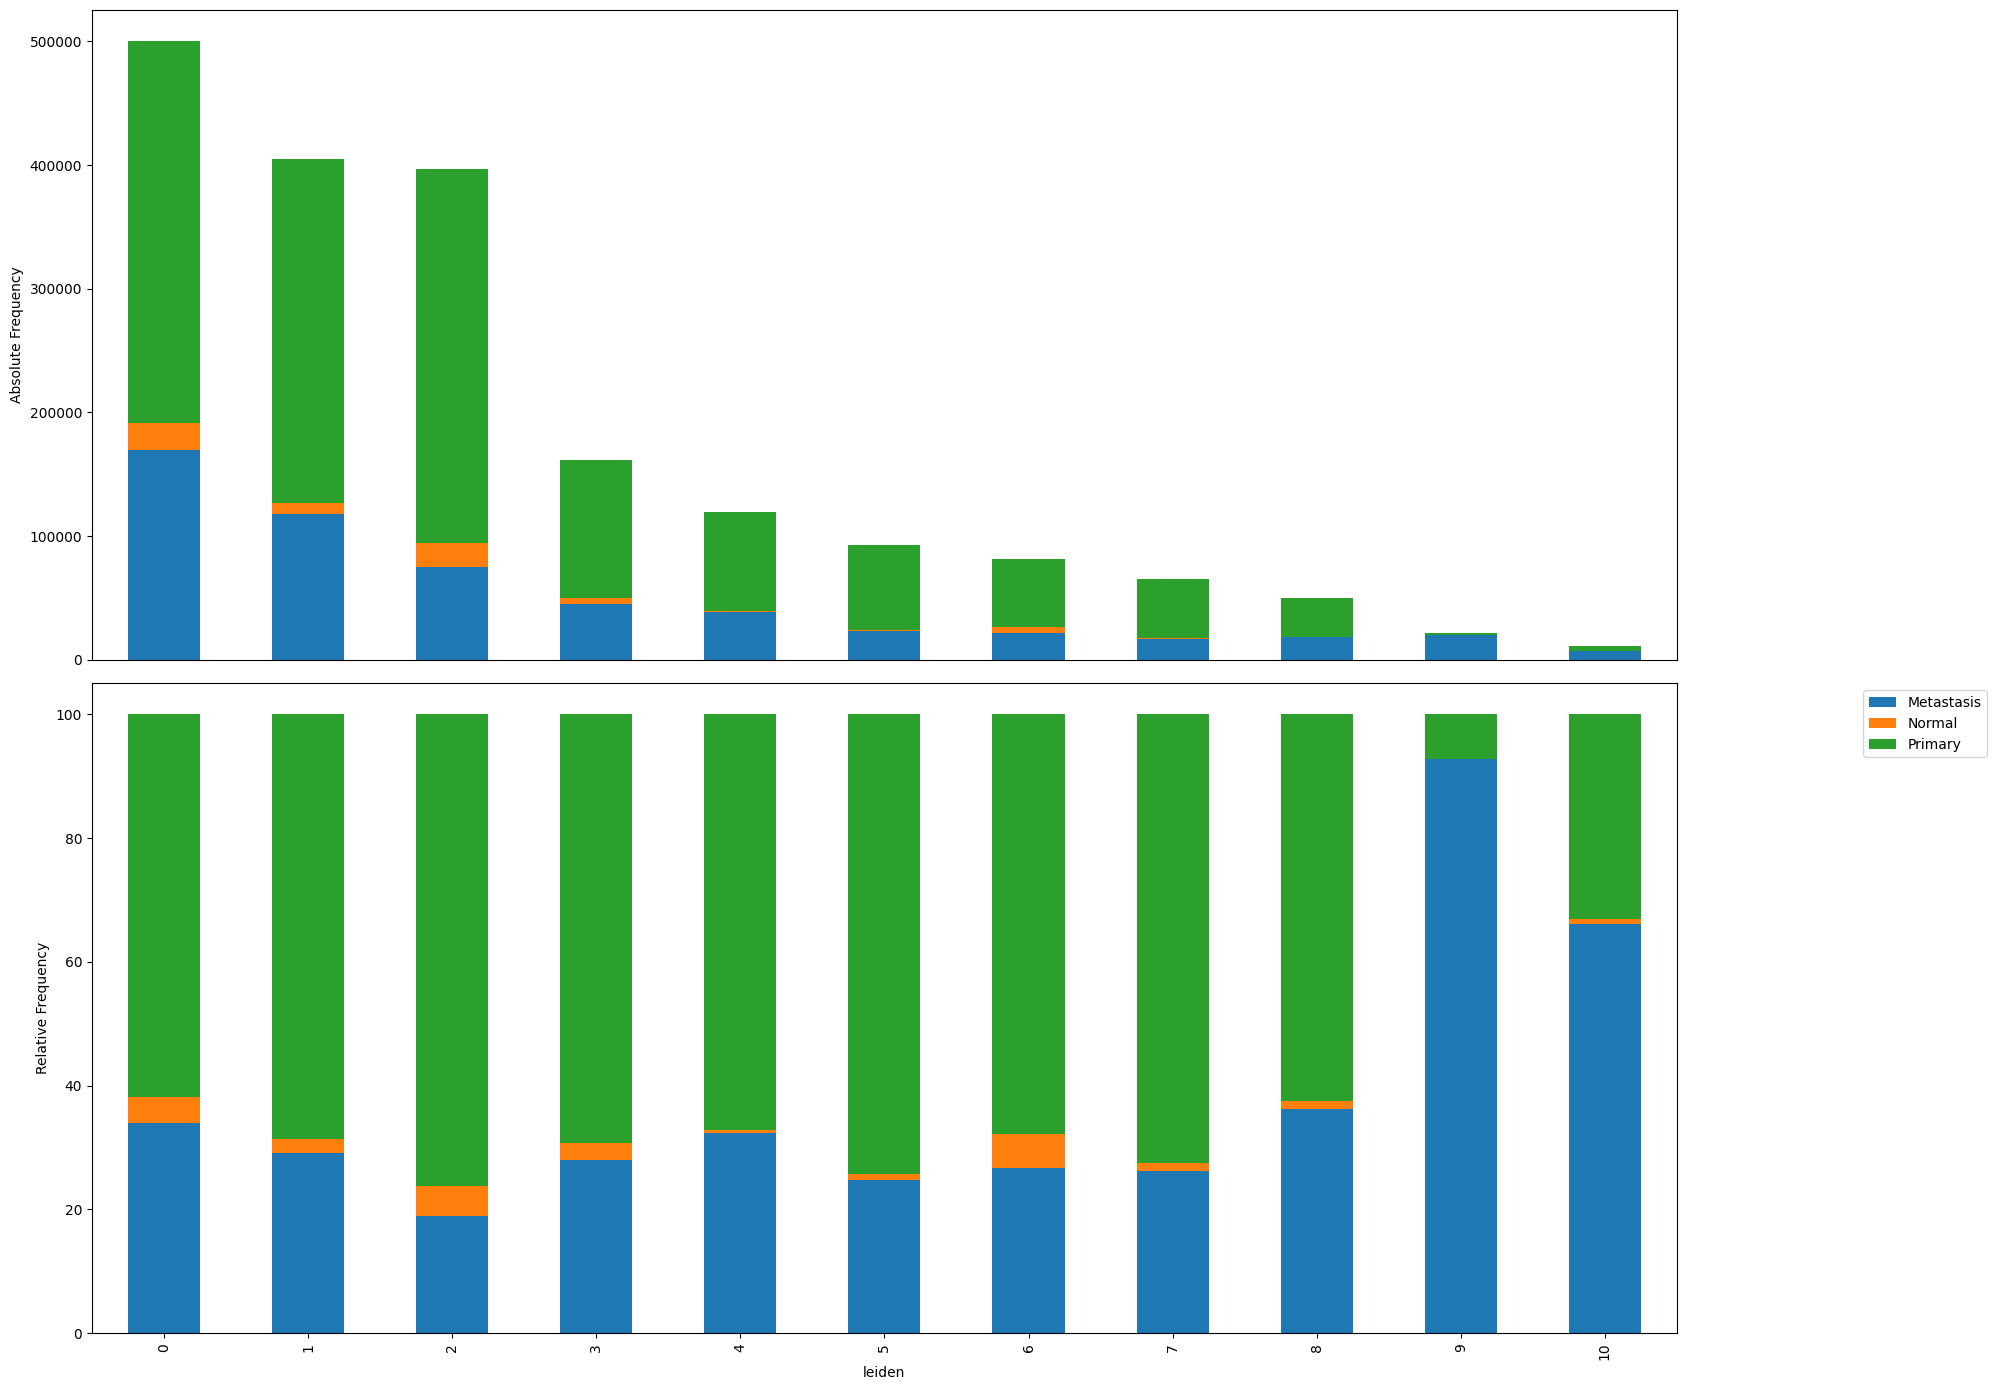

In [38]:
fig, (ax2, ax1) = plt.subplots(2, 1,figsize=(20, 14))
ax1 = adata.obs.groupby("leiden")["stage"].value_counts(normalize=True).mul(100).unstack().plot.bar(stacked=True,legend=False,ax=ax1)
ax2.set_xlabel(" ")
ax2.get_xaxis().set_visible(False)
ax1.set_ylabel("Relative Frequency")
ax1.grid(False)
ax1.legend(bbox_to_anchor=(1.2, 1.0))
ax2 = adata.obs.groupby("leiden")["stage"].value_counts(normalize=False).mul(100).unstack().plot.bar(stacked=True,legend=False,ax=ax2)
ax2.set_xlabel("Cluster")
ax2.set_ylabel("Absolute Frequency")
ax2.grid(False)
fig.tight_layout()

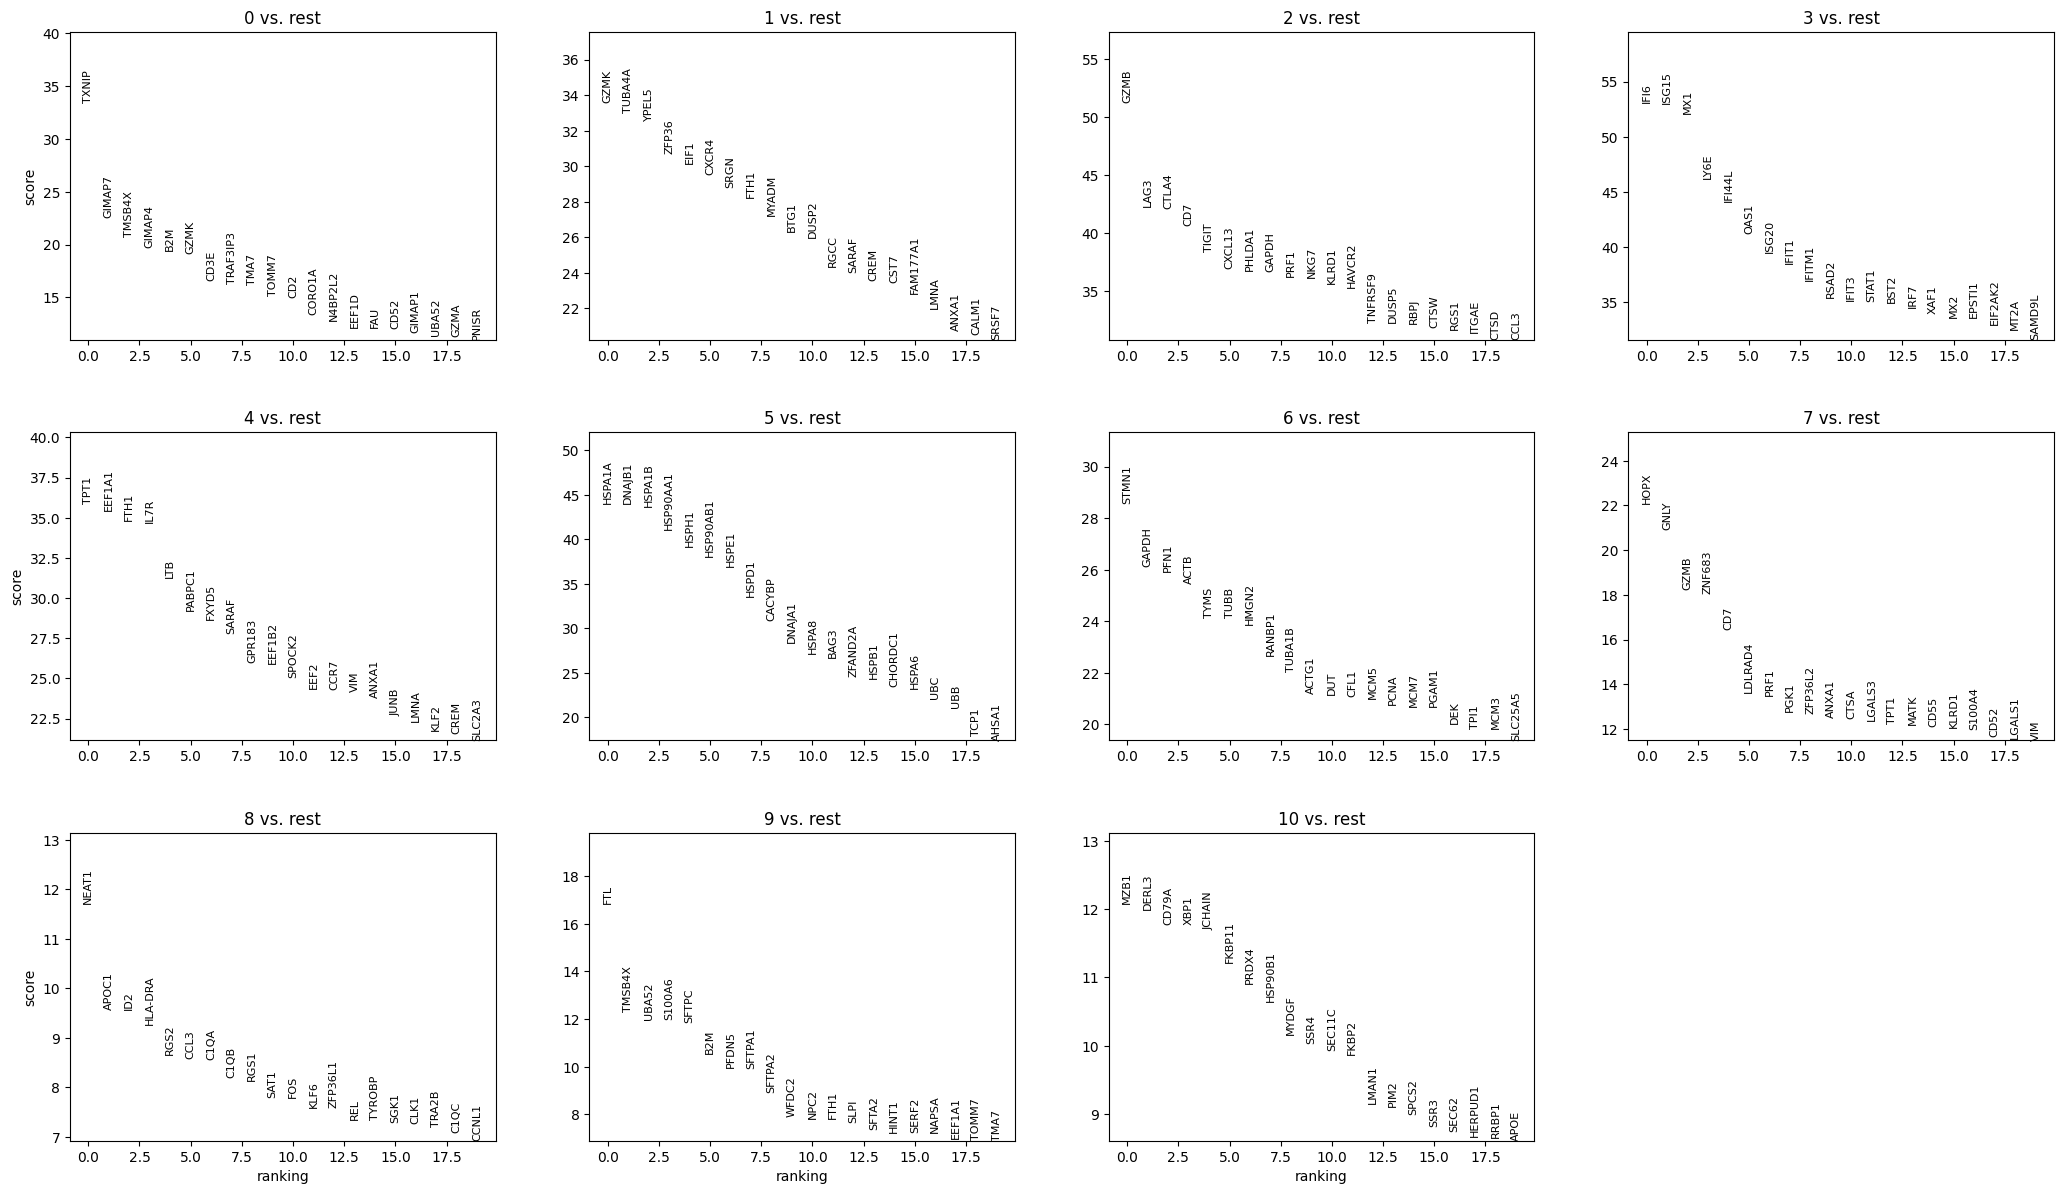

In [40]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon',pts=0.20)
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

categories: 0, 1, 2, etc.
var_group_labels:  


/home/lugli/spuccio/scanpy/scanpy/plotting/_dotplot.py:811: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


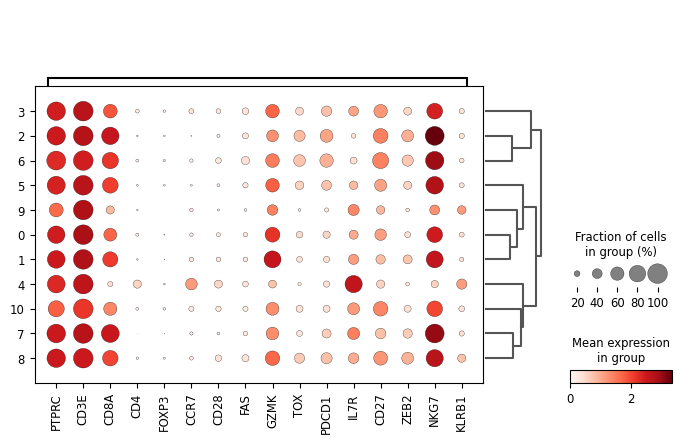

In [41]:
sc.pl.dotplot(adata, {" ":["PTPRC","CD3E","CD8A","CD4","FOXP3","CCR7","CD28","FAS","GZMK","TOX","PDCD1",
                          "IL7R","CD27","ZEB2","NKG7","KLRB1",]}, 'leiden', dendrogram=True)